In [8]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of loans
num_loans = 15

# Generate random loan data
loan_data = {
    "Loan_ID": [f"L{str(i).zfill(3)}" for i in range(1, num_loans + 1)],
    "Loan_Amount": np.random.randint(5000, 50000, num_loans),
    "Loan_Term": np.random.choice([12, 24, 36, 48, 60], num_loans),
    "Interest_Rate": np.round(np.random.uniform(3.0, 15.0, num_loans), 2),
    "Age": np.random.randint(21, 65, num_loans),
    "Income": np.random.randint(2000, 15000, num_loans),
    "Credit_Score": np.random.randint(300, 850, num_loans),
    "Loan_Status": np.random.choice([0, 1], num_loans)  # 1 = Paid, 0 = Default
}

# Convert to DataFrame
df = pd.DataFrame(loan_data)

# Save to CSV
df.to_csv("loan_dataset.csv", index=False)

# Display the first few rows
print("Generated Loan Dataset:")
print(df.head())


Generated Loan Dataset:
  Loan_ID  Loan_Amount  Loan_Term  Interest_Rate  Age  Income  Credit_Score  \
0    L001        20795         48           7.59   28    2161           637   
1    L002         5860         60          14.80   55    6297           352   
2    L003        43158         12           8.60   34   12173           516   
3    L004        49732         48          13.32   37    2995           487   
4    L005        16284         24          11.16   56   13534           679   

   Loan_Status  
0            0  
1            0  
2            0  
3            1  
4            0  


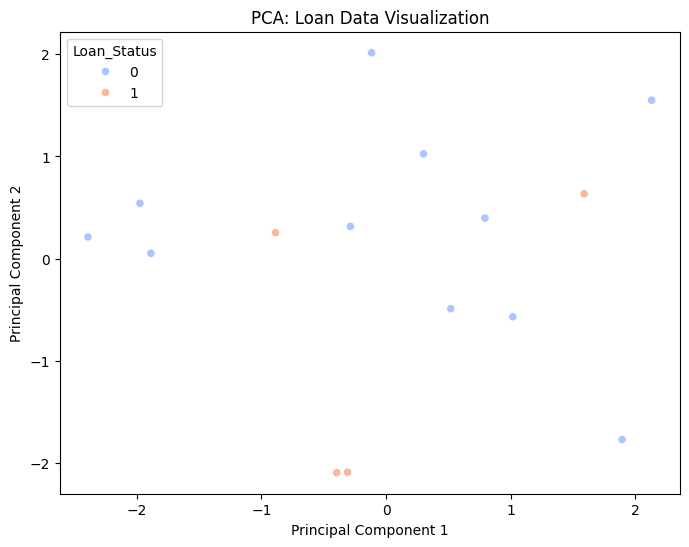

Explained Variance Ratio (PCA): [0.30029283 0.2333469 ]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("loan_dataset.csv")

# Select numerical columns for PCA & LDA (excluding Loan_ID and Loan_Status for now)
features = ["Loan_Amount", "Loan_Term", "Interest_Rate", "Age", "Income", "Credit_Score"]

# Standardize the data (important for PCA & LDA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# ---------------------------
# PCA (Principal Component Analysis)
# ---------------------------
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Loan_Status"] = df["Loan_Status"]  # Add Loan_Status for visualization

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue=df_pca["Loan_Status"], palette="coolwarm", data=df_pca)
plt.title("PCA: Loan Data Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Print explained variance (importance of each component)
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)

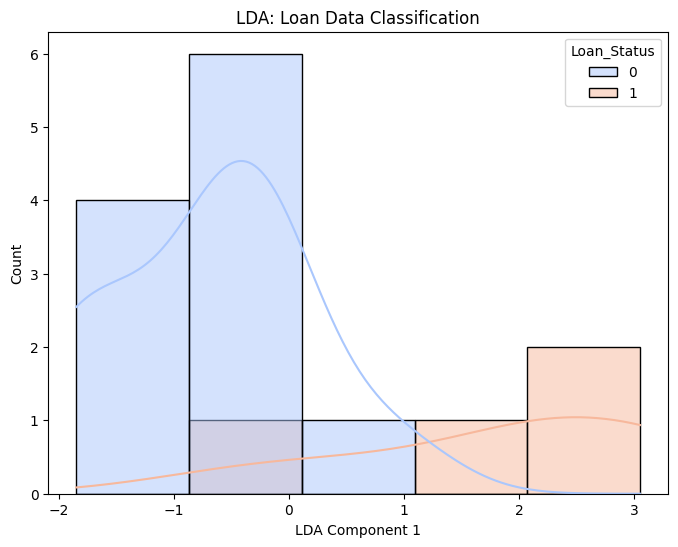

LDA Coefficients: [[ 2.5826093   0.26221844  0.26993896  1.67235726 -1.99424814  1.38477869]]


In [ ]:
# LDA (Linear Discriminant Analysis)

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)  # Reduce to 1 component since we have 2 classes (Loan Paid/Default)
X_lda = lda.fit_transform(X_scaled, df["Loan_Status"])

# Create DataFrame with LDA results
df_lda = pd.DataFrame(X_lda, columns=["LDA1"])
df_lda["Loan_Status"] = df["Loan_Status"]

# Plot LDA results
plt.figure(figsize=(8, 6))
sns.histplot(data=df_lda, x="LDA1", hue="Loan_Status", kde=True, palette="coolwarm")
plt.title("LDA: Loan Data Classification")
plt.xlabel("LDA Component 1")
plt.ylabel("Count")
plt.show()

print("LDA Coefficients:", lda.coef_)  # Show feature importance in LDA